# Titanic Survival Prediction

The goal of this notebook is to get some hands on practice on building machine learning models and the workflow that a typical data scientist would go through. This notebook aims to correctly identify if passengers would survive the Titanic shipwreck given some input features. The dataset has been provided by [kaggle](https://www.kaggle.com/c/titanic). 

## Workflow Stages

I will try and achieve the following steps : 

1. Understand the question statement and the problem at hand.
2. Explore the dataset provided to us and make sense of the input features at hand. 
3. Data Cleaning and handling missing values.
4. Feature Engineering
5. Data preprocessing and basic modelling.
6. Model Tuning and prediction along with visualizing the data.
7. Make final predictions and submit the results to kaggle. 

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Loading the datasets into pandas Dataframes
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df['train_test'] = 'train'
test_df['train_test'] = 'test'

In [6]:
test_df['Survived'] = np.NAN

In [7]:
all_data = [train_df, test_df]

In [8]:
all_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

## Understanding the Problem Statement

The problem statement is that given certain features regarding the passengers on board the Titanic, can we correctly predict and classify them as Survived or not. 

The [kaggle competition website](https://www.kaggle.com/c/titanic) explains in detail what the dataset is about and what each column represents. I have referenced the same as well. Below are the column names and their meanings : 


| Variable |              Definition             |                       Key                       |
|:--------:|:-----------------------------------:|:-----------------------------------------------:|
| survival |           Survived or not           |                 0 = No, 1 = Yes                 |
|  pclass  |             Ticket Class            |            1 = 1st, 2 = 2nd, 3 = 3rd            |
|    sex   |                Gender               |                                                 |
|    age   |             Age in years            |                                                 |
|   sibsp  | Number of siblings/spouses on board |                                                 |
|   parch  | Number of parents/children on board |                                                 |
|  ticket  |            ticket number            |                                                 |
|   fare   |            Passenger Fare           |                                                 |
|   cabin  |             Cabin Number            |                                                 |
| embarked |         Port of embarkation         | C = Cherbourg, Q = Queenstown,  S = Southampton |


**Variable Notes**

- pclass: A proxy for socio-economic status (SES)
  1st = Upper
  2nd = Middle
  3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
  Sibling = brother, sister, stepbrother, stepsister
  Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
  Parent = mother, father
  Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.

## Explore the Dataset

I now seperated the numerical and categorical columns based on the definition of the columns stated above and analyzed and visualized both these seperately. I used histograms for numerical columns to understand their distribution and made pivot tables with Survived to understand correlation. For categorical columns, made countplots to look at the class balance and made pivot tables to understand relationship with predictor variable (Survived). 

After reading the definitions, I made some hypothesis that Women would be more likely to survive 

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


**Categorical Features :** Survived, Sex, Embarked and Pclass (Ordinal as 1st class > 2nd class > 3rd class based on SES)

**Numerical Features :** Age, Fare (continuous) and Parch, SibSp(discrete)

**Alpha Numeric Features:** Cabin, Ticket (This means that there might be something which may need correction)

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_numerical = train_df[['Age', 'Fare', 'Parch', 'SibSp']]
df_cat = train_df[['Survived', 'Pclass', 'Sex', 'Embarked']]

In [12]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked,train_test
count,891,891,891,204,889,891
unique,891,2,681,147,3,1
top,"Milling, Mr. Jacob Christian",male,1601,C23 C25 C27,S,train
freq,1,577,7,4,644,891


Some points to note : 

- Name is unique with 891 values.
- There were 577 males out of 891 i.e. 65% were males. 
- Cabin has a lot of missing values and a lot of duplicate values. 
- Ticket has approx 20% duplicate values
- Most passengers (72%) boarded from the Southampton port. 
- Age has a few missing values. 
- More than 75% passengers didn't travel with a parent or child. 


### Assumptions and Validating them

We will now want to correlate each feature with Survival and decide whether to keep it or not. We can also end up engineering some new features. We will also need to fill in the missing values wherever required. Some features like Cabin and Ticket has a lot of duplicates and a lot of missing values and hence might be dropped. Also, PassengerId is just a unique key and an identifier hence serves no purpose for our predictions. It will be dropped as well. Names are unique across the training set, but we could get a title or something from the Name column to use for our model. And at last, instead of having SibSp and Parch, we could have a Family variable with count of family members. 

I assumed the following as well and will validate these as well: 

- Women are more likely to survive.
- Upper class people (Pclass = 1) are more likely to survive. 
- Children would be more likely to survive. 

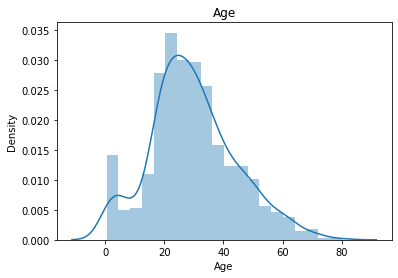

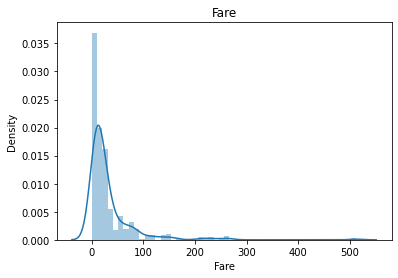

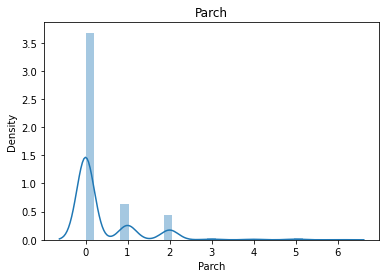

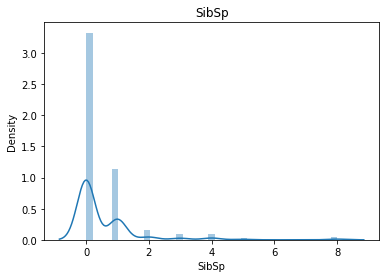

In [13]:
for i in df_numerical.columns:
    sns.distplot(df_numerical[i], kde = True)
    plt.title(i)
    plt.show()

As we can see that Age is fairly normalized and Fare is not. Parch and SibSp are discrete so we may not worry about them. We may have to normalize the Fare variable. 

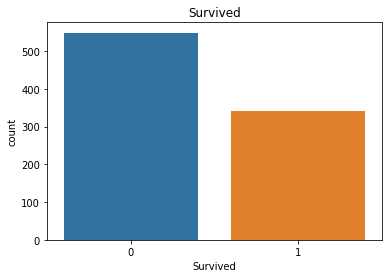

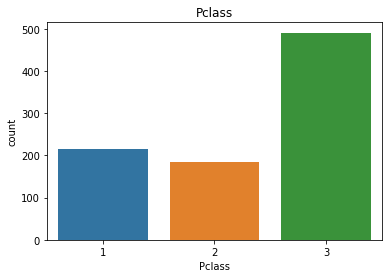

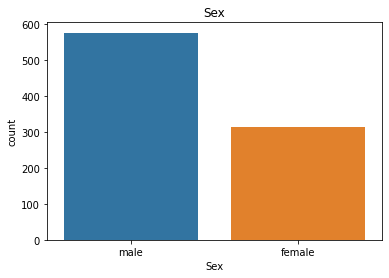

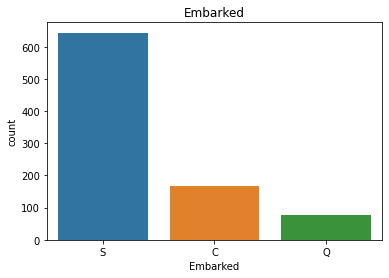

In [14]:
for i in df_cat.columns:
    sns.countplot(df_cat[i])
    plt.title(i)
    plt.show()

In [15]:
for col in ['Sex', 'Pclass', 'SibSp', 'Parch']:
    print (train_df[[col, 'Survived']].groupby(col, as_index = False).mean().sort_values('Survived', ascending = False))
    print('__________________________________')

      Sex  Survived
0  female  0.742038
1    male  0.188908
__________________________________
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
__________________________________
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
__________________________________
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
__________________________________


Hence, we can validate our assumption that most women survived (74%). Also, upper class passengers survived more than others. Hence, we will use Sex and Pclass features in model building. 

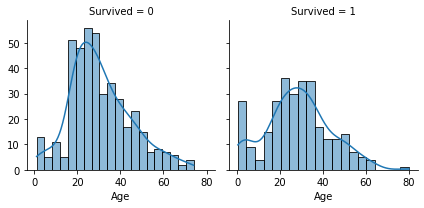

In [16]:
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(sns.histplot, 'Age', kde = True, bins = 20)

We can validate another assumption that infants and children were more likely to survive. It will be better to convert our continuous feature age to categorical bins using pd.qcut() to assign a range of values to it. Hence, we will consider Age as a feature in model building. 

## Data Cleaning

<AxesSubplot:>

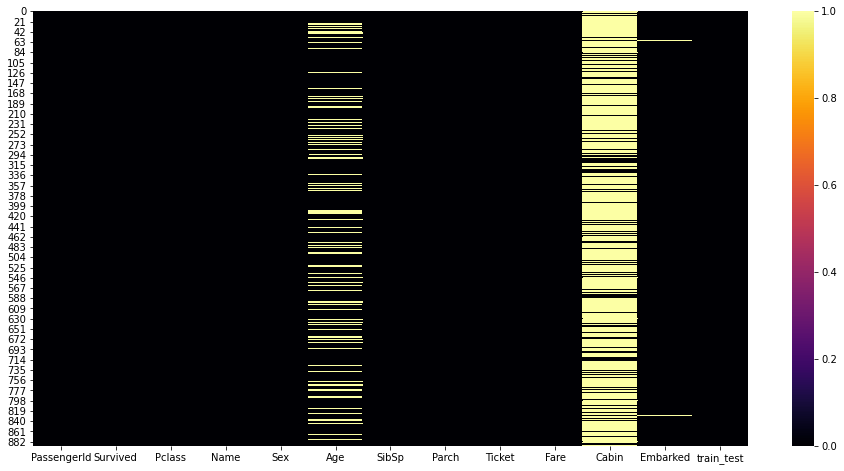

In [17]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_df.isnull(), cmap = 'inferno')

In [18]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

<AxesSubplot:>

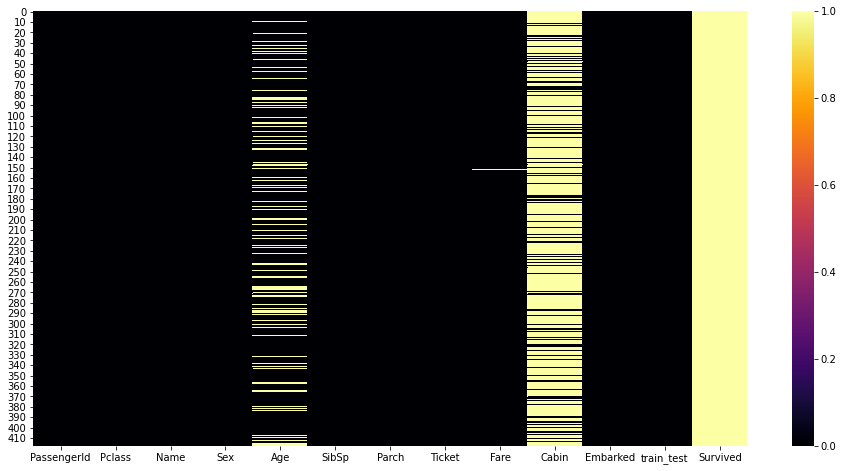

In [19]:
plt.figure(figsize=(16, 8))
sns.heatmap(test_df.isnull(), cmap = 'inferno')

In [20]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train_test       0
Survived       418
dtype: int64

Since, Cabin and Ticket have a lot of duplicates and missing values, I will drop it. 

In [21]:
#train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
#test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
all_data = [train_df, test_df]

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [23]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

train_df[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [24]:
for dataset in all_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median()) #used median because of skewed distribution of Fare
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
train_df[['CategoricalFare', 'Survived']].groupby('CategoricalFare').mean()

,Survived
CategoricalFare,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Hence, passengers paying higher amount were more likely to survive. 

In [25]:
for dataset in all_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

,CategoricalAge,Survived
0,"(-0.08, 16.0]",0.500000
1,"(16.0, 32.0]",0.348624
2,"(32.0, 48.0]",0.386454
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [27]:
for dataset in all_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [28]:
for dataset in all_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [29]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Again, we see that most of the females survived thus we can use the title feature to our benefit. 

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,CategoricalFare,CategoricalAge,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,train,"(-0.001, 7.91]","(16.0, 32.0]",2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,train,"(31.0, 512.329]","(32.0, 48.0]",2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,train,"(7.91, 14.454]","(16.0, 32.0]",1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,train,"(31.0, 512.329]","(32.0, 48.0]",2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,train,"(7.91, 14.454]","(32.0, 48.0]",1,1,Mr


In [31]:
all_data = [train_df, test_df]

In [37]:
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male' : 1})
    
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,CategoricalFare,CategoricalAge,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",NaN,1,1,0,A/5 21171,0,NaN,NaN,train,"(-0.001, 7.91]","(16.0, 32.0]",2,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,2,1,0,PC 17599,0,C85,NaN,train,"(31.0, 512.329]","(32.0, 48.0]",2,0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",NaN,1,0,0,STON/O2. 3101282,0,NaN,NaN,train,"(7.91, 14.454]","(16.0, 32.0]",1,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,2,1,0,113803,0,C123,NaN,train,"(31.0, 512.329]","(32.0, 48.0]",2,0,0.0
4,5,0,3,"Allen, Mr. William Henry",NaN,2,0,0,373450,0,NaN,NaN,train,"(7.91, 14.454]","(32.0, 48.0]",1,1,0.0
